# Create Reusable components using LineaPy

This use case illustrates how LineaPy can facilitate standardization for common or repeated tasks.

~~1. ***Exploratory Data Analysis and Feature Engineering.*** Using various statistics and visualizations, we explore the given data
to create useful features. We use LineaPy to store the transformed data as an artifact, which allows us to automatically refactor and clean up the code.~~

~~2. ***Training a Model.*** Using the transformed data, we train a model that can predict housing prices. We then store
the trained model as an artifact.~~

~~3. ***Building an End-to-End Pipeline.*** Using artifacts saved in this session, we quickly build an end-to-end
pipeline that combines data preprocessing and model training, moving closer to production.~~


<div class="alert alert-info">

If you encounter issues you cannot resolve, simply ask in our [Slack community](https://join.slack.com/t/lineacommunity/shared_invite/zt-18kizfn3b-1Qu_HDT3ahGudnAwoFAw9Q)'s `#support` channel. We are always happy and ready to help you!

</div>

## Creating a reusable component

For this section, lets say we are starting with a brand new data set. Common practice is to understand the data first. There are many facets to this that are often second nature to most data scientists and each one has their own set of functions they call to understand the data they get. Lets look at a sample  all or part of which might be useful:

~~doing data analysis and feature engineering on tabular data containing features for house sales price prediction. A detailed description of the dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
We will start with exploratory data analysis (EDA) on the dataset. As we establish understanding of the dataset by inspecting the raw content, computing statistics, and creating visualizations, we will be incrementally cleaning the dataset to move towards a dataset that can be used for model training.
We will be using `lineapy` to help us extract the preprocessing pipeline from our work session without us having to retrace our steps to figure out what parts of the notebook were EDA and what parts were transforming the data and thus should be included in the pipeline. We do this by simply adding `import lineapy` in the first cell and then invoking lineapy.save on the final training dataframe to create a Linea Artifact.~~

<div class="alert alert-info">

You can ignore `# NBVAL_*` and safely remove it from the notebook as you go through the example. It is for passing unit tests only, which we do to make sure the examples are always functional as we update the codebase.

</div>

In [5]:
# Set option so plots in EDA are visible
%matplotlib inline

# The magic import
import lineapy
from dataclasses import dataclass
lineapy.tag("Reusable Components Demo")

In [6]:
# NBVAL_IGNORE_OUTPUT
import pandas as pd

# change input here for new data. For now we'll restrict to a pandas dataframe
input_data = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/use_cases/predict_house_price/data/ames_train_cleaned.csv"
training_data = pd.read_csv(input_data)

In [7]:
# let us create an object to hold on to the different EDA components
from dataclasses import dataclass

@dataclass
class BasicEDA:
    name:str
    head:object = None
    tail:object = None
    columns:object = None
    shape:object = None
    nulls:object = None
    dtypes:object = None
    described:object = None
    correlations:object = None
    
    def __repr__(self):
        return self.report()
    def report(self):
        # This is to compile our EDA into one report
        returnstr = f"""
        EDA report for: {self.name}
        
        Basic info: {self.shape[0]} Features and {self.shape[1]} samples
        
        Null report: 
        {self.nulls}
        
        All Columns:
        {self.columns}
        
        All Dtypes:
        {self.dtypes}
        
        Basic Stats by features:
        {self.described}
        
        |
        |
        |
        Samples:
        ------------ First 10 samples ------------
        {self.head}
        ------------ Last 10 samples ------------
        {self.tail}
        """
        return returnstr
    def plots(self):
        import seaborn as sb
        sb.heatmap(self.correlations, cmap="Blues", annot=False)
        
eda = BasicEDA(name = "Data flagged for fraud activity")
lineapy.save(eda,"test")

# common calls for EDA

eda.head = training_data.head()

# some might also look at the tail
eda.tail = training_data.tail()

# makes sense to get the names of all our columns
eda.columns = training_data.columns

# and the size of our data.
eda.shape = training_data.shape

# column data types may catch unexpected types that might cause issues during training
eda.dtypes = training_data.dtypes

# check for nulls and get list of columns that have nulls along with the null count
eda.nulls = training_data[training_data.columns[training_data.isnull().any()]].isnull().sum()

# alternately, we can use some cool functions pandas provides for EDA
# this one only prints to console/output_cell
# training_data.info()

eda.described = training_data.describe()
eda.correlations = training_data.corr()

Can't pickle <class 'BasicEDA'>: attribute lookup BasicEDA on builtins failed                                                          


PicklingError: Can't pickle <class 'BasicEDA'>: attribute lookup BasicEDA on builtins failed

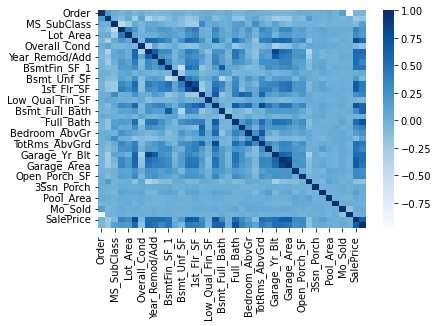

In [4]:
eda.plots()


In [5]:
print(eda.report())


        EDA report for: Data flagged for fraud activity
        
        Basic info: 1998 Features and 83 samples
        
        Null report: 
        Lot_Frontage       352
Alley             1865
Mas_Vnr_Type        18
Mas_Vnr_Area        18
Bsmt_Qual           56
Bsmt_Cond           56
Bsmt_Exposure       57
BsmtFin_Type_1      56
BsmtFin_SF_1         1
BsmtFin_Type_2      56
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Electrical           1
Fireplace_Qu       975
Garage_Type        113
Garage_Yr_Blt      114
Garage_Finish      114
Garage_Qual        114
Garage_Cond        114
Pool_QC           1991
Fence             1607
Misc_Feature      1922
dtype: int64
        
        All Columns:
        Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Ov

### Saving the EDA process as a reusable artifact

~~TODO~~

In [6]:
artifact = lineapy.save(eda, "EDA_basic")

Can't pickle <class 'BasicEDA'>: attribute lookup BasicEDA on builtins failed                                                          


PicklingError: Can't pickle <class 'BasicEDA'>: attribute lookup BasicEDA on builtins failed

The code for creating the artifact can be retrieved via the `get_code()` method on the artifact. Note that the code contains only the necessary and sufficient operations. That is, the code for EDA that does not transform the data is excluded from the artifact code, and the artifact code is sufficient to reproduce the results. From the entire notebook session, LineaPy is able to automatically extract the following code for producing the artifact:

In [ ]:
print(artifact.get_code())

## Training a model

Now, we will use the training data we got to train a simple Linear Regression Model for predicting house price. We will use LineaPy to save the model and the code for creating the model into a Linea Artifact.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
train, val = train_test_split(training_data, test_size=0.3, random_state=42)
X_train = train.drop(['SalePrice'], axis = 1)
y_train = train.loc[:, 'SalePrice']
X_val = val.drop(['SalePrice'], axis = 1)
y_val = val.loc[:, 'SalePrice']

In [ ]:
# NBVAL_IGNORE_OUTPUT
X_train

In [ ]:
# NBVAL_IGNORE_OUTPUT
y_train

In [ ]:
linear_model = LinearRegression(fit_intercept=True)

In [ ]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [ ]:
X_val["Predicted Sales Price"] = y_predicted

In [ ]:
# NBVAL_IGNORE_OUTPUT
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_predicted, squared=False)
rmse

The results look good. Let's save the model using LineaPy

In [ ]:
artifact = lineapy.save(linear_model, 'linear_model_housing')

## Building an End-to-End Pipeline

We can combine the preprocessing and modeling steps and use LineaPy to create a data pipeline from artifacts with the to_pipeline function. We currently support Python scripts and Airflow as the two frameworks for running pipelines. Learn more about pipelines in the official docs [here](https://docs.lineapy.org/en/latest/tutorials/00_api_basics.html#Using-artifacts-to-build-pipelines) and the detailed tutorial [here](https://github.com/LineaLabs/lineapy/blob/main/examples/tutorials/02a_build_pipelines.ipynb).


Let's now create a pipeline containing the data preprocessing artifact `cleaned_data_housing` and the model training artifact `linear_model_housing`

In [ ]:
# NBVAL_SKIP
import os
directory = lineapy.to_pipeline(
    ["cleaned_data_housing","vector_encoder", "linear_model_housing"], 
    framework="AIRFLOW",
    pipeline_name="data_housing_pipeline",
    dependencies={ "linear_model_housing": { "cleaned_data_housing" } },
    output_dir="./airflow/dags/"
)

We see the pipeline building resulting in the following 4 files:

In [ ]:
# NBVAL_SKIP
os.listdir(directory)

Looking at `data_housing_pipeline_module.py` we see that it contains the modularized code to generate our two artifacts: "training_data" and "linear_model" 

In [ ]:
# NBVAL_SKIP
os.system(f"cat {directory}/data_housing_pipeline_module.py");

Looking at `data_housing_pipeline_dag.py` we see that it contains the Airflow DAG definition. Each of the modules defined in the modules file is composed as an operator in the DAG.

In [ ]:
# NBVAL_SKIP
os.system(f"cat {directory}/data_housing_pipeline_dag.py");

In [ ]:
directory2 = lineapy.to_pipeline(
    ["cleaned_data_housing", "linear_model_housing"], 
    framework="AIRFLOW",
    pipeline_name="data_housing_pipeline",
    dependencies={ "linear_model_housing": { "cleaned_data_housing" } },
    reuse_pre_computed_artifacts=["vector_encoder"],
    output_dir="./airflow/dags/"
)

These files, once placed in the location that Airflow expects (usually `dags/` under Airflow’s home directory), should let us immediately execute the pipeline from the UI or CLI.

In [ ]:
os.system(f"cat {directory2}/data_housing_pipeline_module.py");